# Image Recognition with CNN

- @philmui
- ASDRP Fall 2023 notebook

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
x_train[10][14]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 110, 246,
       254, 254, 254, 254, 254, 171,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

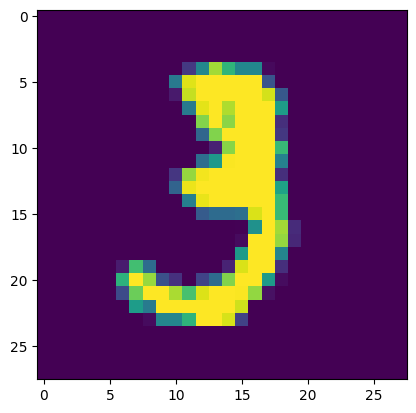

In [5]:
one_image = x_train[10]
plt.imshow(one_image)

In [6]:
y_train[:11]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3], dtype=uint8)

### One-hot Encoding Target

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
y_train.shape

(60000,)

In [9]:
y_cat_train = to_categorical(y_train)
y_cat_train.shape

(60000, 10)

In [10]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [11]:
y_cat_test = to_categorical(y_test)
y_cat_test.shape

(10000, 10)

### Normalize image data from 0-1

In [12]:
x_train = x_train/np.max(x_train)
x_test = x_test/np.max(x_train)

In [13]:
x_train[10][14]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.43137255, 0.96470588, 0.99607843, 0.99607843,
       0.99607843, 0.99607843, 0.99607843, 0.67058824, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

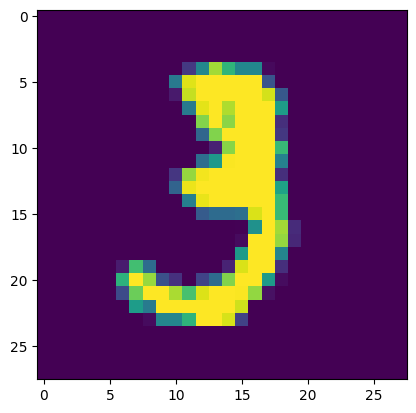

In [14]:
scaled_image = x_train[10]
plt.imshow(scaled_image)

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
# reshape to add a dimension representing the color channel

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [17]:
x_train.shape

(60000, 28, 28, 1)

In [18]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

## Training with Keras

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten

In [23]:
model = Sequential()

input_shape = x_train[0].shape
input_shape

(28, 28, 1)

In [25]:
### LeNet ###

# Convolutional Block
model.add(Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='valid', input_shape=input_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Convolutional Block
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', input_shape=input_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))

model.add(Dense(10, activation='softmax'))

# keras.io/metrics

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', ])

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=1)  

In [27]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1826 - accuracy: 0.9456 - val_loss: 8.6103 - val_accuracy: 0.9785
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0602 - accuracy: 0.9816 - val_loss: 5.9833 - val_accuracy: 0.9884
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0442 - accuracy: 0.9864 - val_loss: 5.3884 - val_accuracy: 0.9884
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0351 - accuracy: 0.9893 - val_loss: 5.2161 - val_accuracy: 0.9901
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0297 - accuracy: 0.9908 - val_loss: 10.1077 - val_accuracy: 0.9837


# Evaluation

In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics

In [ ]:
metrics[['loss', 'val_loss']].plot()

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()

In [ ]:
model.metrics_names

In [ ]:
model.evaluate(x_test, y_cat_test, verbose=0)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = model.predict(x_test)
predictions.shape

In [ ]:
y_pred = np.argmax(predictions, axis=1)
y_pred.shape

In [ ]:
y_pred

In [ ]:
y_cat_test.shape

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

# Prediction

In [ ]:
test_image = x_test[0]
plt.imshow(test_image)

In [ ]:
# shape of input should be: (num_images, width, height, channels)
pred = model.predict(test_image.reshape(1, 28, 28, 1))
pred.shape

In [ ]:
np.argmax(pred)